In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn import metrics

In [190]:
def lower_data(data):
    return data.lower()

def encode_distance(data):
    less_2_half_km = ["tanjong pagar","bras basah","bugis","chinatown","cantonment","havelock road"]
    less_5_km = ["toa payoh","geylang","thomson","dakota"]
    less_7_half_km = ["bishan","marine parade","farrer road","circuit road"]
    more_7_half_km = ["tanah merah", "tampines",'bedok','jurong','sembawang','woodlands','yishun','pasir ris','yio chu kang']
    
    data = data.strip()
    
    if data in less_2_half_km:
        return 1
    if data in less_5_km:
        return 2
    if data in less_7_half_km:
        return 3
    if data in more_7_half_km:
        return 4
    else:
        return -1
    
def encode_yes_no(data):
    if data == 'Yes':
        return 1
    if data == 'No' :
        return 0
    else:
        return -1
    
    
def encode_understanding(data):
    if "No understanding" in data:
        return 0
    if "A little" in data:
        return 1
    if "Very well" in data:
        return 2
    
def encode_freq_exercise(data):
    if data == "4 times a week to everyday":
        return 3
    if data == "Once a week to 3 times a week":
        return 2
    if data == "I don't exercise":
        return 1

def encode_socialise(data):
    data = data.lower()
    data = data.replace(",","")
    data = data.replace(".","")
    socialise_words = ["play","talk","friends","visit","meet","chat","people","family","attending"]
    
    for word in data.split(" "):
        if word in socialise_words:
            return 1
    
    return 0

def encode_volunteer(data):
    data = data.lower()
    data = data.replace(",","")
    data = data.replace(".","")
    socialise_words = ["hospice","voluntary","volunteer"]
    for word in data.split(" "):
        if word in socialise_words:
            return 1

    return 0
    
def prepare_data(df):
    for col in df:
        #get dtype for column
        dt = df[col].dtype 
        #check if it is a number
        if dt == int or dt == float:
            df[col] = df[col].fillna(0)
        else:
            df[col] = df[col].fillna("-")
            
        
    df.columns = ['gender','age','residence','is_working','freq_brasbash','free_time_activities','interact_w_youth','freq_exercise'
             ,'exercise_reason','forms_of_exercise','travel_20mins_exercise','incentives_travel','places_attract_travel','visited_smu'
             ,'purpose_at_smu','seen_campus_green','impression_campus_green','activity_at_campus_green','consider_coming','heard_of_connexion','understanding_of_tech'
             ,'why_lack_understanding','kind_of_tech_used','learn_tech_youth','interest_learn_type','know_shop_online','reasons_shop_online','reason_dont','guidance_learn_willingness_shop','type_workshops']
    
    #Filter out those below 60 years old
    df = df[df.age >= 60]
    df["residence"] = df["residence"].apply(lower_data)
    df.loc[df["residence"] == "20 km from bugis","residence"] = 'jurong'
    df["approx_distance_cat"] = df["residence"].apply(encode_distance)
    
    
    ##Encoding Variables
    
    #Encode Yes or No
    df["is_working"] = df["is_working"].apply(encode_yes_no)
    df["interact_w_youth"] = df["interact_w_youth"].apply(encode_yes_no)
    df["travel_20mins_exercise"] = df["travel_20mins_exercise"].apply(encode_yes_no)
    df["incentives_travel"] = df["incentives_travel"].apply(encode_yes_no)
    df["visited_smu"] = df["visited_smu"].apply(encode_yes_no)
    df["consider_coming"] = df["consider_coming"].apply(encode_yes_no)
    df["heard_of_connexion"] = df["heard_of_connexion"].apply(encode_yes_no)
    df['learn_tech_youth'] = df['learn_tech_youth'].apply(encode_yes_no)
    df["know_shop_online"] = df["know_shop_online"].apply(encode_yes_no)
    df["guidance_learn_willingness_shop"] = df["guidance_learn_willingness_shop"].apply(encode_yes_no)

    #Encode other numerical data
    df["understanding_of_tech"] = df["understanding_of_tech"].apply(encode_understanding)
    df["freq_exercise"] = df["freq_exercise"].apply(encode_freq_exercise)
    df["has_socialise"] = df["free_time_activities"].apply(encode_socialise)
    df["has_volunteer"] = df["free_time_activities"].apply(encode_volunteer)
    
    
    df["preference_of_activity"] = ""

    for index, row in df.iterrows():
        if row["consider_coming"] == 1 and row["learn_tech_youth"] == 1:
            df.at[index,"preference_of_activity"] = 3
        elif row["consider_coming"] == 1:
            df.at[index,"preference_of_activity"] = 2
        elif row["learn_tech_youth"] == 1:
            df.at[index,"preference_of_activity"] = 1
        else:
            df.at[index,"preference_of_activity"] = 0

    print(df["preference_of_activity"])
    df["preference_of_activity"] = df["preference_of_activity"].astype(int)

    return df



def return_new_df_with_columns(df,cols):
    series = []
    for col in cols:
        series.append(df[col])

    x_data = pd.concat(series,axis=1)
    return x_data


In [191]:
df = pd.read_csv("elderly_opinions.csv")
df= prepare_data(df) #perform additional cleanign / preprocessing of data for use

0     0
2     2
3     3
4     3
5     0
6     3
7     3
8     0
9     2
10    3
11    3
12    0
13    2
14    0
15    3
16    3
17    3
18    3
19    2
20    0
21    2
22    3
23    2
Name: preference_of_activity, dtype: object


/Users/eugene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/eugene/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/eugene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [192]:
df.head(15)

,gender,age,residence,is_working,freq_brasbash,free_time_activities,interact_w_youth,freq_exercise,exercise_reason,forms_of_exercise,...,interest_learn_type,know_shop_online,reasons_shop_online,reason_dont,guidance_learn_willingness_shop,type_workshops,approx_distance_cat,has_socialise,has_volunteer,preference_of_activity
0,Female,91,bishan,0,Once a Month,"Stay at home, read newspaper",0,1,Lazy,-,...,-,0,-,Use phone to call,0,-,3,0,0,0
2,Male,81,toa payoh,1,Once a Month,"Use FB, brisk walking",1,2,-,Qi gong,...,-,0,-,No need,0,-,2,0,0,2
3,Female,68,bras basah,1,Daily,Sell flowers,1,1,Not free,-,...,Smart Phone （智能手机) (Telefon Pintar),0,-,No smart phone,1,Not sure,1,0,0,3
4,Male,61,tampines,1,Once a Month,Play and visit friends,1,2,-,Walk only,...,"Computer （电脑）(Komputer),Smart Phone （智能手机) (Te...",0,-,Don't know how to use the app and make account,1,Open to any workshops as long as can attend an...,4,1,0,3
5,Male,80,marine parade,1,Few times a Week,Look after dying people at Dover Park hospice.,0,3,-,Walking near his house,...,-,0,-,He dont even shop. He lives a sinple life. His...,0,No skills. He just want to help people who are...,3,1,1,0
6,Male,87,tanjong pagar,0,Once a Month,"Go to CC and chat, swimming, qi gong",1,3,-,"Swimming, brisk walking, qi gong",...,"Smart Phone （智能手机) (Telefon Pintar),Facebook（脸...",0,-,Because I dont know. Sacred that wife will sco...,1,Learn how to send photo using whatsapp,1,1,0,3
7,Male,60,chinatown,1,Daily,"Take a stroll, meet friends",0,3,-,"Walking, taking a stroll",...,"Smart Phone （智能手机) (Telefon Pintar),Other Mobi...",0,-,"Security reasons, product issues",0,"Google, surfing internet, searching for inform...",1,1,0,3
8,Male,82,havelock road,0,Few times a Week,Walk,1,1,He only walks,-,...,-,0,-,He only does traditional shopping.,0,No skills.,1,0,0,0
9,Male,82,havelock road,0,Few times a Week,Walk around and use public transport to go around,0,1,Dont need to exercise,-,...,-,0,-,"Things maybe more expensive, the item may be f...",0,-,1,0,0,2
10,Male,70,tanjong pagar,0,Once a Month,"Walk, swimming",1,2,-,"Swmming, walking",...,"Computer （电脑）(Komputer),Smart Phone （智能手机) (Te...",0,-,Not safe,1,IT related,1,0,0,3


In [193]:
#x_columns = ["gender","age","is_working","interact_w_youth","freq_exercise","know_shop_online","approx_distance_cat","has_socialise","has_volunteer","preference_of_activity"]

In [194]:
from sklearn.model_selection import train_test_split

df = pd.read_csv("elderly_opinions.csv")
df = prepare_data(df)

x_exercise = ["interact_w_youth","freq_exercise","approx_distance_cat","has_socialise","has_volunteer","travel_20mins_exercise"]
y_exercise = df["consider_coming"]


exercise_variables_df = return_new_df_with_columns(df,x_exercise)
exercise_variables_df.head(5)



0     0
2     2
3     3
4     3
5     0
6     3
7     3
8     0
9     2
10    3
11    3
12    0
13    2
14    0
15    3
16    3
17    3
18    3
19    2
20    0
21    2
22    3
23    2
Name: preference_of_activity, dtype: object


/Users/eugene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/eugene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/eugene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:

,interact_w_youth,freq_exercise,approx_distance_cat,has_socialise,has_volunteer,travel_20mins_exercise
0,0,1,3,0,0,0
2,1,2,2,0,0,0
3,1,1,1,0,0,0
4,1,2,4,1,0,0
5,0,3,3,1,1,1


In [195]:
#Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(exercise_variables_df, y_exercise, test_size = 0.15, 
                                                          stratify = y_exercise,
                                                          random_state = 20)

In [196]:
y_train

8     0
5     0
13    1
14    0
23    1
9     1
22    1
21    1
20    0
2     1
11    1
0     0
19    1
16    1
18    1
6     1
4     1
10    1
3     1
Name: consider_coming, dtype: int64

In [197]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(X_train, y_train)
print(NB.classes_)
print(NB.class_prior_)


print()

print("===For Class 0===")
for i in range(len(x_exercise)):
    print(x_exercise[i],":",NB.theta_[0][i])

print()
print("===For Class 1===")
for i in range(len(x_exercise)):
    print(x_exercise[i],":",NB.theta_[1][i])

[0 1]
[0.26315789 0.73684211]

===For Class 0===
interact_w_youth : 0.4
freq_exercise : 1.6
approx_distance_cat : 2.8
has_socialise : 0.4
has_volunteer : 0.2
travel_20mins_exercise : 0.6

===For Class 1===
interact_w_youth : 0.8571428571428571
freq_exercise : 1.6428571428571428
approx_distance_cat : 2.2857142857142856
has_socialise : 0.6428571428571429
has_volunteer : 0.07142857142857142
travel_20mins_exercise : 0.5714285714285714


In [198]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, random_state = 1)
    
# Fit dt to the training set
dt.fit(X_train, y_train) 


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

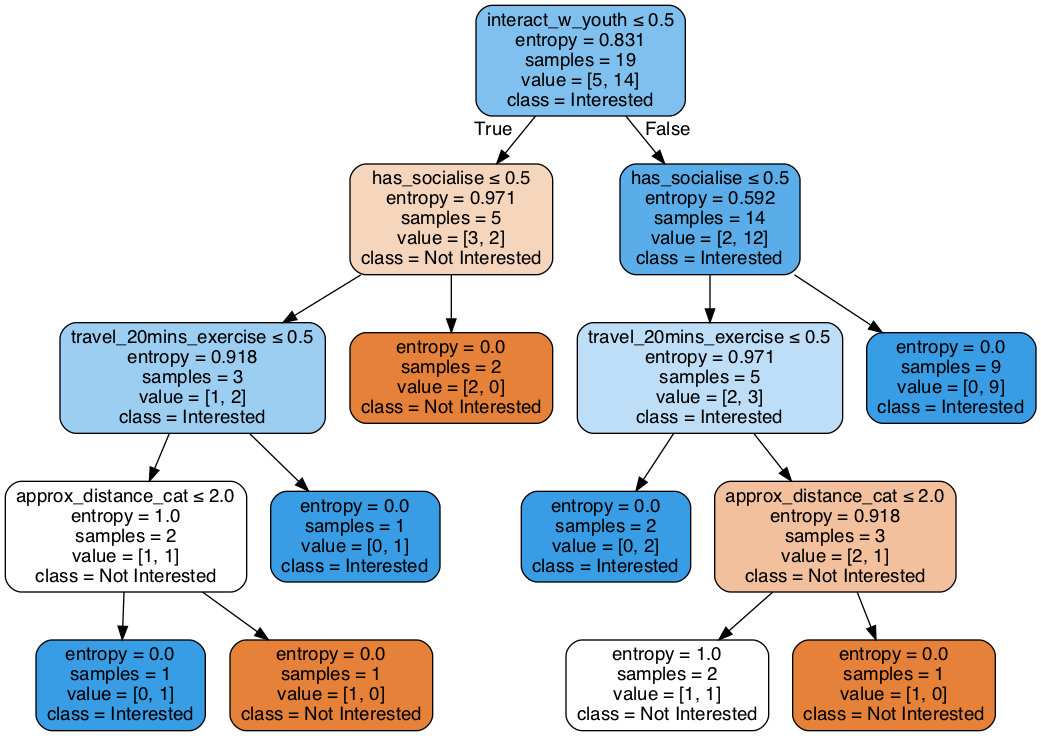

In [199]:
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.externals.six import StringIO  
from IPython.display import Image

feature_cols = x_exercise

dot_data = StringIO()
export_graphviz(dt, out_file = dot_data, 
                      feature_names = feature_cols,  
                     filled = True, rounded = True,  
                    special_characters = True,class_names=["Not Interested","Interested"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree_elderly_exercise.png')
Image(graph.create_png())

In [200]:
dt.classes_

array([0, 1])

In [201]:
#Cross Validation
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

dt_score = []

for train_index, test_index in loo.split(X_train.to_numpy()):
    
    X_loo_train, X_loo_test = X_train.to_numpy()[train_index], X_train.to_numpy()[test_index]
    y_loo_train, y_loo_test = y_train.to_numpy()[train_index], y_train.to_numpy()[test_index]
    
        
    y_predict = dt.predict(X_loo_test)
    dt_score.append(metrics.accuracy_score(y_loo_test,y_predict))

    
print("Avg Cross Validation Score of Decision Tree",sum(dt_score)/len(dt_score))

Avg Cross Validation Score of Decision Tree 0.9473684210526315


In [202]:

y_pred = dt.predict(X_test)
print("Accuracy for Decision Tree :")
print(round(metrics.accuracy_score(y_test, y_pred), 3))

Accuracy for Decision Tree :
0.75


In [221]:
from sklearn.ensemble import RandomForestClassifier

max_acc = 0
min_acc = 0.5
max_rfc = None
estimators = 8

## Only uncomment if you intend to re-train the model (please don't overwrite the best model;)
# for i in range(0,200):
#     rfc = RandomForestClassifier(criterion='entropy',n_estimators=estimators)
#     rfc.fit(X_train, y_train) 

#     y_pred = rfc.predict(X_test)
#     acc_score = round(metrics.accuracy_score(y_test, y_pred), 3)

#     if(acc_score >= min_acc and acc_score > max_acc):
#         max_acc = acc_score
#         max_rfc = rfc

#         print("Accuracy for Random Forest Tree :")
#         print(acc_score)

        
# joblib.dump(max_rfc,"random_forest_classifier_elderly_exercise.sav")


max_rfc = joblib.load("./backup_best_models/random_forest_classifier_elderly_exercise.sav")

In [222]:
#Cross Validation
loo = LeaveOneOut()

dt_score = []

for train_index, test_index in loo.split(X_train.to_numpy()):
    
    X_loo_train, X_loo_test = X_train.to_numpy()[train_index], X_train.to_numpy()[test_index]
    y_loo_train, y_loo_test = y_train.to_numpy()[train_index], y_train.to_numpy()[test_index]
    
        
    y_predict = max_rfc.predict(X_loo_test)
    dt_score.append(metrics.accuracy_score(y_loo_test,y_predict))

    
print("Avg Cross Validation Score of Random Forest",sum(dt_score)/len(dt_score))

Avg Cross Validation Score of Random Forest 1.0


In [223]:
for i in range(len(x_exercise)):
    print(x_exercise[i],":",max_rfc.feature_importances_[i])

interact_w_youth : 0.20518156855770703
freq_exercise : 0.10707611684523119
approx_distance_cat : 0.025503843498338445
has_socialise : 0.2558276838872927
has_volunteer : 0.14732151335897548
travel_20mins_exercise : 0.21283670540764596


In [206]:
#Calculate probabiltiy of those who will change their mind if incentives is provided
incentives_travel_df = df.loc[df["travel_20mins_exercise"] == 0]
len(incentives_travel_df["incentives_travel"])

incentives_x = incentives_travel_df["travel_20mins_exercise"]
incentives_y = incentives_travel_df["incentives_travel"]


print("Probability of changing their mind to travel if there is incentive")
incentives_y.value_counts(1)


Probability of changing their mind to travel if there is incentive


1    0.555556
0    0.444444
Name: incentives_travel, dtype: float64

In [207]:
print(incentives_x)
print(incentives_y)

0     0
2     0
3     0
4     0
9     0
12    0
14    0
19    0
21    0
Name: travel_20mins_exercise, dtype: int64
0     0
2     1
3     1
4     1
9     0
12    0
14    0
19    1
21    1
Name: incentives_travel, dtype: int64


In [208]:
will_come_w_incentives = incentives_travel_df.loc[incentives_travel_df["incentives_travel"] == 1]
will_come_w_incentives["consider_coming"].value_counts(1)


#All elderlies who will travel w incentive would consider coming SMU to exercis


will_not_come_w_incentive = incentives_travel_df.loc[incentives_travel_df["incentives_travel"]== 0]
will_not_come_w_incentive["consider_coming"].value_counts(1)


#Only 25% of elderlies who will not travel w incentive would still consider coming to SMU to exercise

0    0.75
1    0.25
Name: consider_coming, dtype: float64

In [209]:
def count_tech_used(data):
    tech_list = data.split(",")
    if len(tech_list) == 1 :
        if(tech_list[0] == '-'):
            return 0
    return len(tech_list)
    
df["no_of_tech_used"] = df["kind_of_tech_used"].apply(count_tech_used)
df["no_of_tech_used"]

0     1
2     3
3     0
4     3
5     1
6     3
7     3
8     1
9     1
10    3
11    5
12    0
13    4
14    2
15    2
16    2
17    4
18    2
19    0
20    2
21    2
22    0
23    3
Name: no_of_tech_used, dtype: int64

In [210]:


x_tech_cols = ["interact_w_youth","has_socialise","has_volunteer","approx_distance_cat","understanding_of_tech","no_of_tech_used","know_shop_online"]
y_tech = df["learn_tech_youth"]
x_tech = return_new_df_with_columns(df,x_tech_cols)

#Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(x_tech, y_tech, test_size = 0.15, 
                                                          stratify = y_tech,
                                                          random_state = 5)

X_train


,interact_w_youth,has_socialise,has_volunteer,approx_distance_cat,understanding_of_tech,no_of_tech_used,know_shop_online
10,1,0,0,1,1,3,0
6,1,1,0,1,1,3,0
17,1,1,0,3,2,4,0
20,1,0,0,3,1,2,0
18,1,1,0,4,1,2,0
19,1,1,0,3,0,0,0
23,1,1,0,4,2,3,1
0,0,0,0,3,0,1,0
3,1,0,0,1,0,0,0
9,0,0,0,1,1,1,0


In [211]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(X_train, y_train)
print(NB.classes_)
print(NB.class_prior_)

print()

print("===For Class 0===")
for i in range(len(x_tech_cols)):
    print(x_tech_cols[i],":",NB.theta_[0][i])

print()
print("===For Class 1===")
for i in range(len(x_tech_cols)):
    print(x_tech_cols[i],":",NB.theta_[1][i])

[0 1]
[0.52631579 0.47368421]

===For Class 0===
interact_w_youth : 0.5
has_socialise : 0.6
has_volunteer : 0.1
approx_distance_cat : 2.9
understanding_of_tech : 0.8
no_of_tech_used : 1.5
know_shop_online : 0.1

===For Class 1===
interact_w_youth : 0.8888888888888888
has_socialise : 0.7777777777777778
has_volunteer : 0.1111111111111111
approx_distance_cat : 2.0
understanding_of_tech : 0.8888888888888888
no_of_tech_used : 2.4444444444444446
know_shop_online : 0.1111111111111111


In [212]:


dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, random_state = 1)
    
# Fit dt to the training set
dt.fit(X_train, y_train) 


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

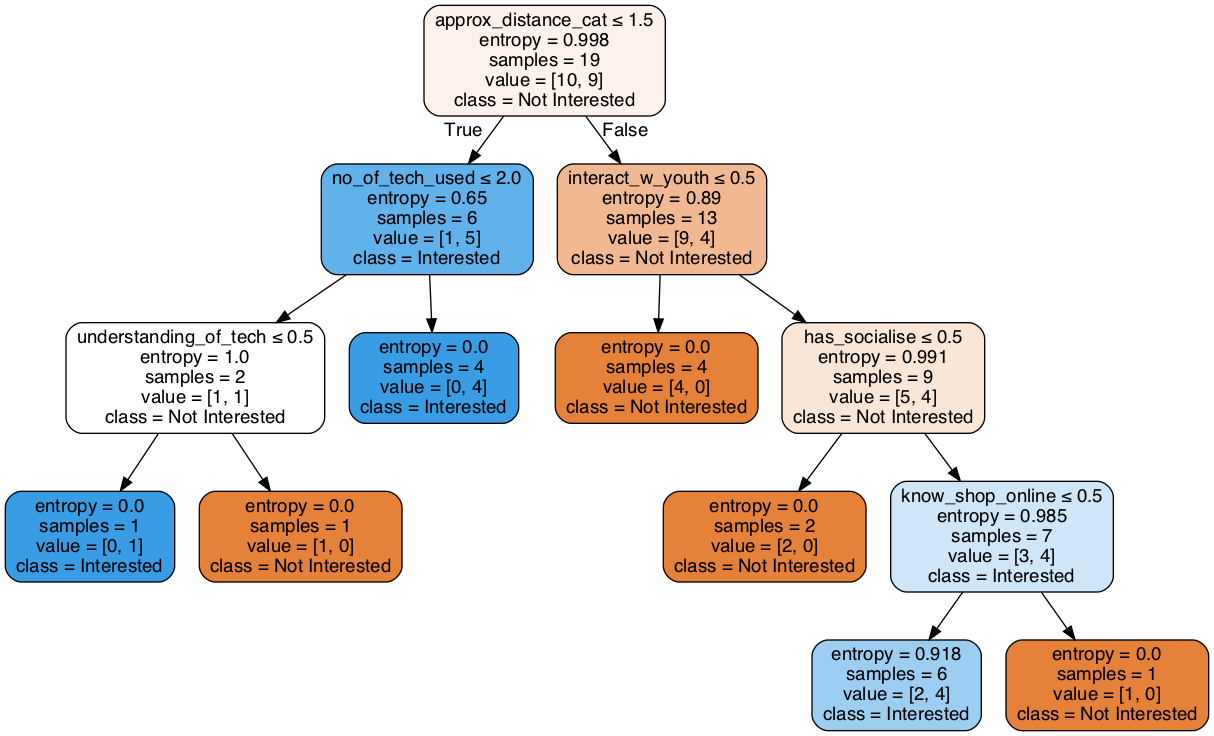

In [213]:
feature_cols = x_tech_cols

dot_data = StringIO()
export_graphviz(dt, out_file = dot_data, 
                      feature_names = feature_cols,  
                     filled = True, rounded = True,  
                    special_characters = True,class_names=["Not Interested","Interested"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree_elderly_tech.png')
Image(graph.create_png())

In [214]:
dt.classes_

array([0, 1])

In [215]:
#Cross Validation
loo = LeaveOneOut()

dt_score = []

for train_index, test_index in loo.split(X_train.to_numpy()):
    
    X_loo_train, X_loo_test = X_train.to_numpy()[train_index], X_train.to_numpy()[test_index]
    y_loo_train, y_loo_test = y_train.to_numpy()[train_index], y_train.to_numpy()[test_index]
    
        
    y_predict = dt.predict(X_loo_test)
    dt_score.append(metrics.accuracy_score(y_loo_test,y_predict))

    
print("Avg Cross Validation Score of DT",sum(dt_score)/len(dt_score))

Avg Cross Validation Score of DT 0.8947368421052632


In [216]:
result = dt.predict(X_test)
print(result)
acc_score = round(metrics.accuracy_score(y_test, result), 3)
print(acc_score)

[0 1 0 1]
1.0
